In [1]:
# Ensembling 
# Ensembling have two terms- Variance and Bias
# Ensembling learning methods: Bagging, Boosting, Stacking, 
# Bagging: Same algo on diffrent data subset-> parallel
# Boostin-> Same algo an same data
# Voting: Different on same data
# Stacking: Different on same data-> serial + prallel


In [3]:
# Overfitting and Underfitting
# Overfitting: 

In [4]:
# Bootstrapping: 
# Bagging: DT1, DT2, ...(DT- Decision Tree)
# Random Forest: First algo in bagging


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn is a Python visualization library based on matplotlib that provides a high-level interface for drawing attractive and 
#informative statistical graphics. Here are some reasons why Seaborn is commonly used:

In [7]:
df=pd.read_csv('datasets/banknotes.csv')# load the file

In [8]:

x=df.drop('Class',axis=1)# input variable
y=df['Class']# output variable

In [9]:
y.value_counts()# count values 

Class
0    762
1    610
Name: count, dtype: int64

##### Cross Validation

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=0)

In [12]:
##### Build the model

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
clf_rf=RandomForestClassifier(random_state=0, n_estimators=20)# n_estimators tells how many DT decision tree are you creating

In [36]:
clf_rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

##### Evaluate the Performance

In [30]:
y_pred=clf_rf.predict(x_test)

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [32]:
print(confusion_matrix(y_test,y_pred))

[[193   2]
 [  2 146]]


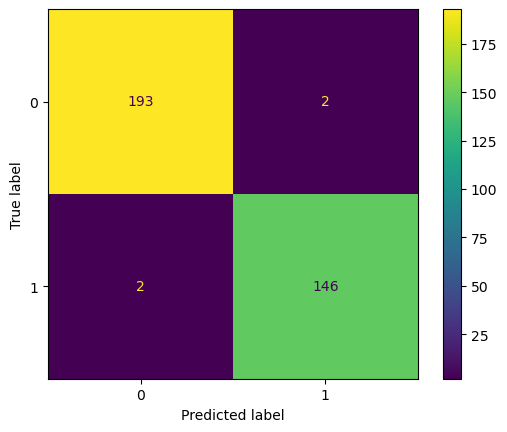

In [33]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [34]:
accuracy_score(y_test,y_pred)

0.9883381924198251

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       195
           1       0.99      1.00      0.99       148

    accuracy                           0.99       343
   macro avg       0.99      0.99      0.99       343
weighted avg       0.99      0.99      0.99       343



In [37]:
clf_rf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=209652396),
 DecisionTreeClassifier(max_features='sqrt', random_state=398764591),
 DecisionTreeClassifier(max_features='sqrt', random_state=924231285),
 DecisionTreeClassifier(max_features='sqrt', random_state=1478610112),
 DecisionTreeClassifier(max_features='sqrt', random_state=441365315),
 DecisionTreeClassifier(max_features='sqrt', random_state=1537364731),
 DecisionTreeClassifier(max_features='sqrt', random_state=192771779),
 DecisionTreeClassifier(max_features='sqrt', random_state=1491434855),
 DecisionTreeClassifier(max_features='sqrt', random_state=1819583497),
 DecisionTreeClassifier(max_features='sqrt', random_state=530702035),
 DecisionTreeClassifier(max_features='sqrt', random_state=626610453),
 DecisionTreeClassifier(max_features='sqrt', random_state=1650906866),
 DecisionTreeClassifier(max_features='sqrt', random_state=1879422756),
 DecisionTreeClassifier(max_features='sqrt', random_state=1277901399),
 DecisionTree

from sklearn.tree import plot_tree

In [38]:
from sklearn.tree import plot_tree

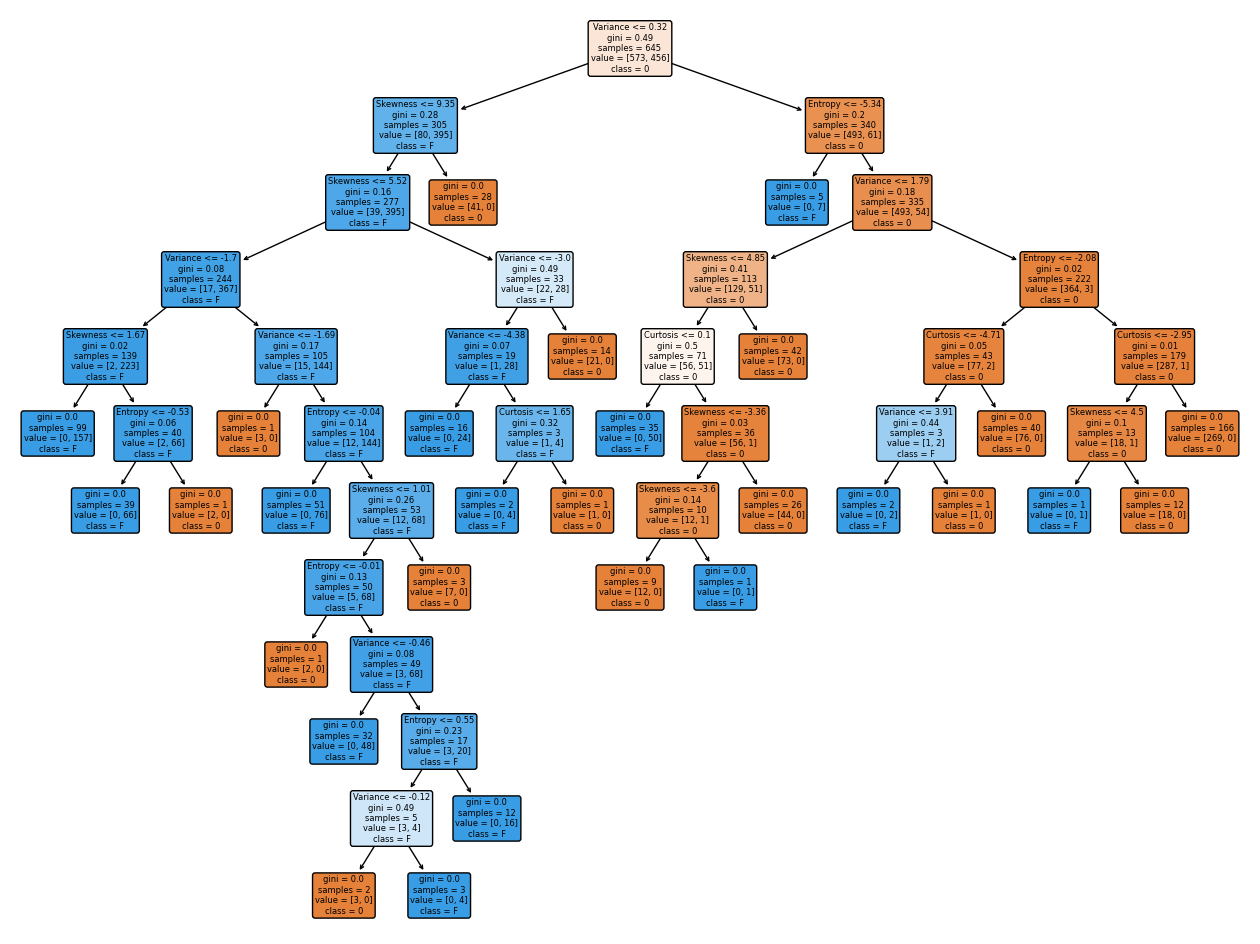

In [39]:
plt.figure(figsize=(16,12))
plot_tree(clf_rf.estimators_[3], fontsize=6, feature_names=x.columns, filled=True, precision=2, class_names=['0','F'],rounded=True)
plt.savefig('tree.png')

In [40]:
# how much time it takes to train the algo

In [43]:
%%time
clf_rf.fit(x_train,y_train)

CPU times: total: 31.2 ms
Wall time: 37 ms


RandomForestClassifier(n_estimators=20, random_state=0)

In [44]:
from sklearn.tree import DecisionTreeClassifier
clf_tree=DecisionTreeClassifier(random_state=0)

In [46]:
%%time
clf_tree.fit(x_train,y_train)

CPU times: total: 0 ns
Wall time: 2 ms


DecisionTreeClassifier(random_state=0)

In [47]:
import time

In [48]:
time.time()

1720681307.719061

In [49]:
time.asctime()

'Thu Jul 11 12:34:43 2024'

In [56]:
start=time.time()
print('Hello World')
end=time.time()

Hello World


In [57]:
end-start

0.0

In [62]:
start=time.time()
clf_tree.fit(x_train,y_train)
end=time.time()
print('Decision Tree:',end-start)

start=time.time()
clf_rf.fit(x_train,y_train)
end=time.time()
print('Random Forest:',end-start)

Decision Tree: 0.0020003318786621094
Random Forest: 0.036998748779296875
